In [21]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%config InlineBackend.figure_format='retina'

In [22]:
df = pd.read_csv('R01_posneg_gest_stats_fdr05.csv')

In [23]:
df = df[df['Sodium_Adduct'] == 0]
df = df[df['Potasium_Adduct'] == 0]
df = df[df['Ammonium_Adduct'] == 0]
df = df[df['ACN_Adduct'] == 0]
df = df[df['Formate_Adduct'] == 0]
df = df[df['H2O_Adduct'] == 0]
df = df[df['CO2_Adduct'] == 0]
df = df[df['pos_neg_dup'] == 0]

In [24]:
dfH = df.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

dfH['meanMA'] = dfHM.mean(axis=1)
dfH['stdMA'] = dfHM.std(axis=1)
dfH['meanCA'] = dfHC.mean(axis=1)
dfH['stdCA'] = dfHC.std(axis=1)

x = dfH['meanMA']
y = dfH['meanCA']
xerror = dfH['stdMA']
yerror = dfH['stdCA']

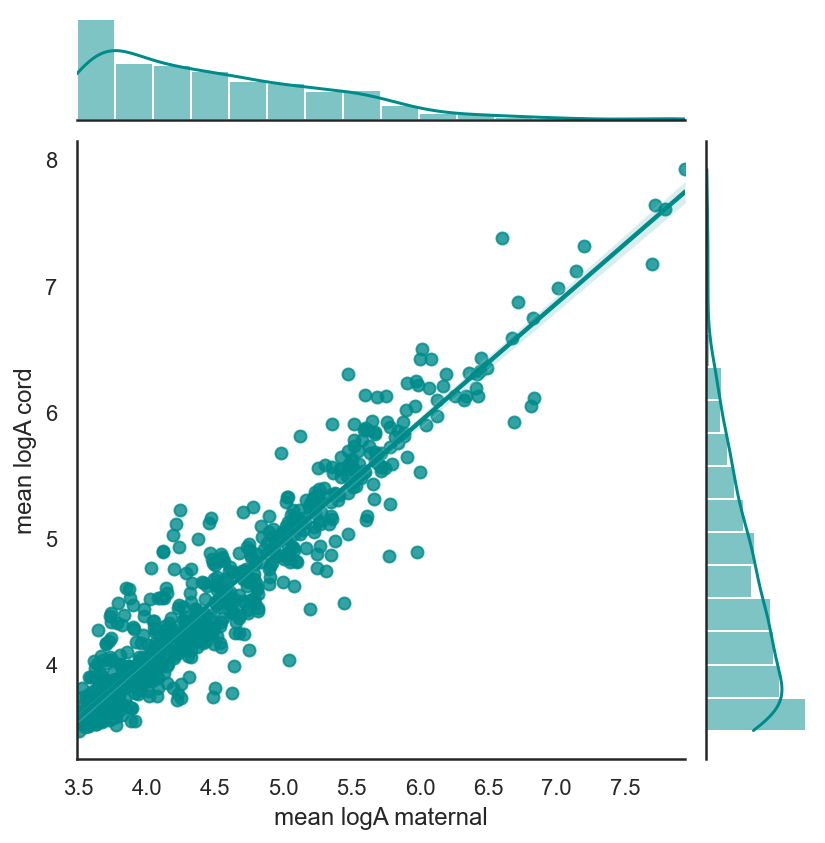

In [25]:
from warnings import filterwarnings
filterwarnings('ignore')

sns.set(font_scale=1)
sns.set_style('white')
fig = sns.jointplot('meanMA','meanCA', data=dfH, color='darkcyan', kind='reg')
#fig.annotate(stats.pearsonr)
plt.xlabel('mean logA maternal')
plt.ylabel('mean logA cord')
#plt.errorbar(x, y, yerr=yerror, fmt=' ', barsabove=False, ecolor='darkcyan', elinewidth=0.3)
plt.show()
#fig.savefig('meanlogMAMCyerrors.png', dpi=400)

Text(0, 0.5, 'kernel density estimate')

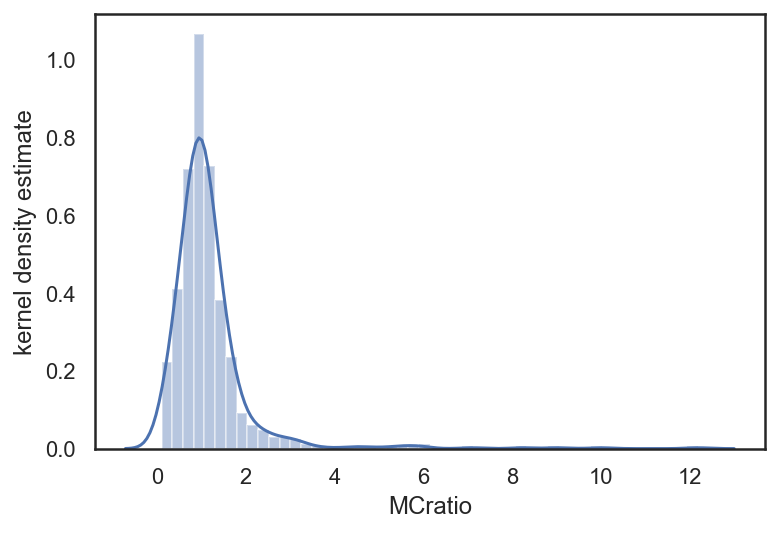

In [26]:
dfH = 10**dfH
dfH['MCratio'] = dfH['meanMA']/dfH['meanCA']
fig = sns.distplot(dfH['MCratio'])
plt.xlabel('MCratio')
plt.ylabel('kernel density estimate')
#fig.figure.savefig('MCratio.png', dpi=400)

Text(0, 0.5, 'kernel density estimate')

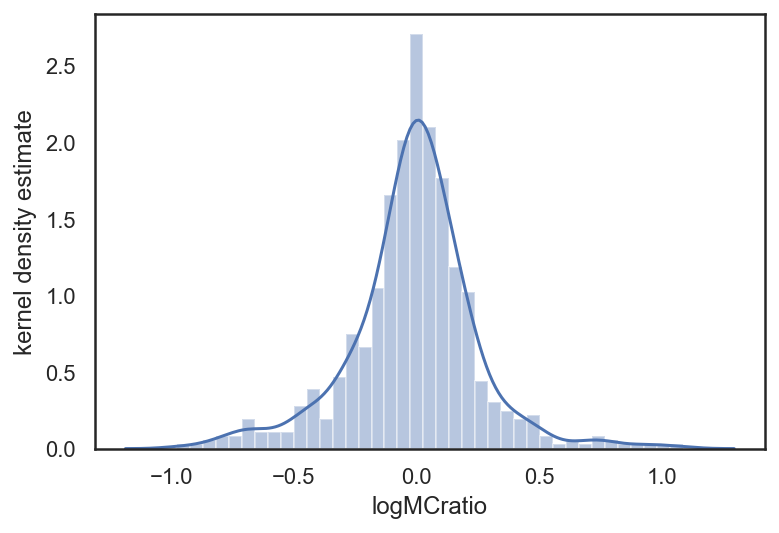

In [27]:
dfH['logMCratio'] = np.log10(dfH['MCratio'])
fig = sns.distplot(dfH['logMCratio'])
plt.xlabel('logMCratio')
plt.ylabel('kernel density estimate')
#fig.figure.savefig('logMCratio.png', dpi=400)

<AxesSubplot:xlabel='MCratio'>

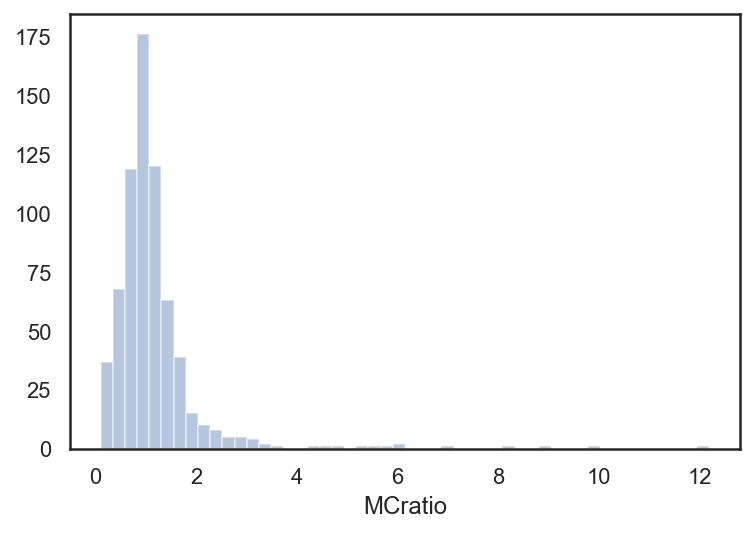

In [28]:
sns.distplot(dfH['MCratio'], kde=False)

<AxesSubplot:xlabel='MCratio', ylabel='Density'>

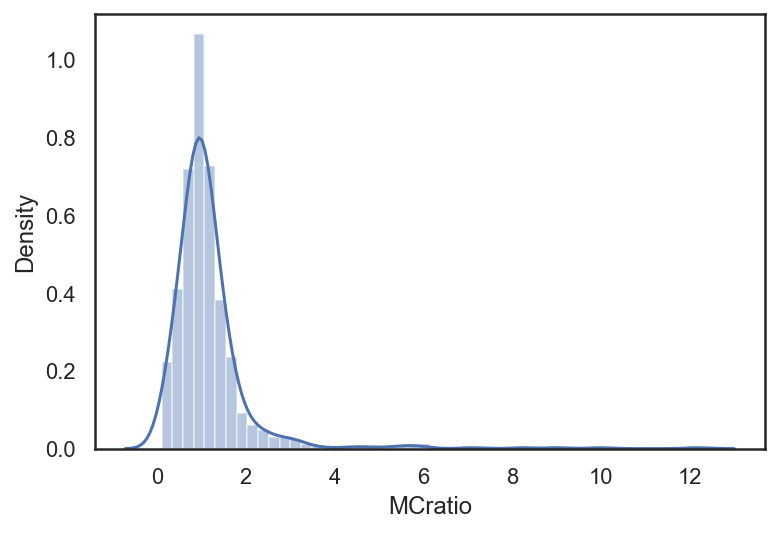

In [29]:
sns.distplot(dfH['MCratio'])

In [30]:
df['logMCratio'] = dfH['logMCratio']
df.to_csv('maternal_cord_ratios.csv')

In [31]:
dfH['MCratio_g1'] = np.where(dfH['MCratio']<-0.25, 'G1', '')
dfH['MCratio_g2'] = np.where((dfH['MCratio']>=-0.25)&(dfH['MCratio']<0.25), 'G2', '')
dfH['MCratio_g3'] = np.where(dfH['MCratio']>=0.25, 'G3', '')
dfH['MCratioG'] = dfH['MCratio_g1'] + dfH['MCratio_g2'] + dfH['MCratio_g3']

In [306]:
dfH['Mass_Av'] = df['Mass_Av']
dfH['Retention Time_av'] = df['Retention Time_av']

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
G2 v.s. G3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
G1 v.s. G3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


(<matplotlib.axes._subplots.AxesSubplot at 0x7fcace688310>,
  <statannot.StatResult.StatResult at 0x7fcac1bf1190>])

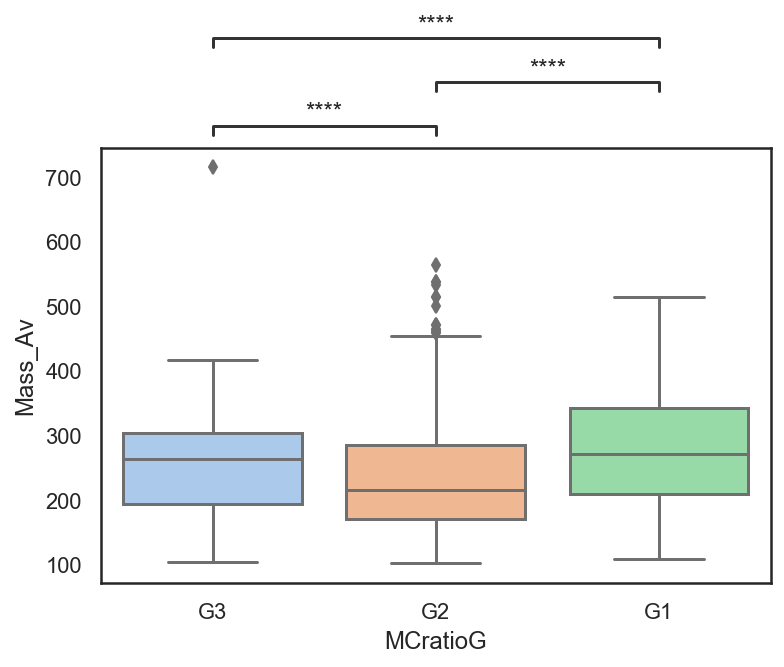

In [308]:
order = ['G1', 'G2', 'G3']
ax = sns.boxplot(x="MCratioG", y="Mass_Av", data=dfH, palette='pastel')
add_stat_annotation(ax, data=dfH, x=x, y=y, order=order,
                    box_pairs=[("G1", "G2"), ("G1", "G3"), ("G2", "G3")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
G2 v.s. G3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
G1 v.s. G3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


(<matplotlib.axes._subplots.AxesSubplot at 0x7fcac1c11490>,
  <statannot.StatResult.StatResult at 0x7fcac2332910>])

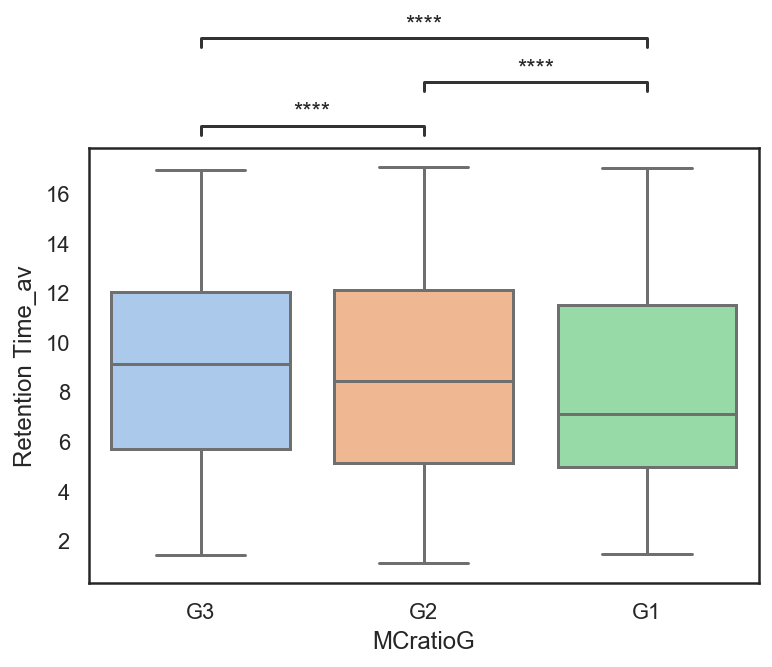

In [309]:
order = ['G1', 'G2', 'G3']
ax = sns.boxplot(x="MCratioG", y="Retention Time_av", data=dfH, palette='pastel')
add_stat_annotation(ax, data=dfH, x=x, y=y, order=order,
                    box_pairs=[("G1", "G2"), ("G1", "G3"), ("G2", "G3")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


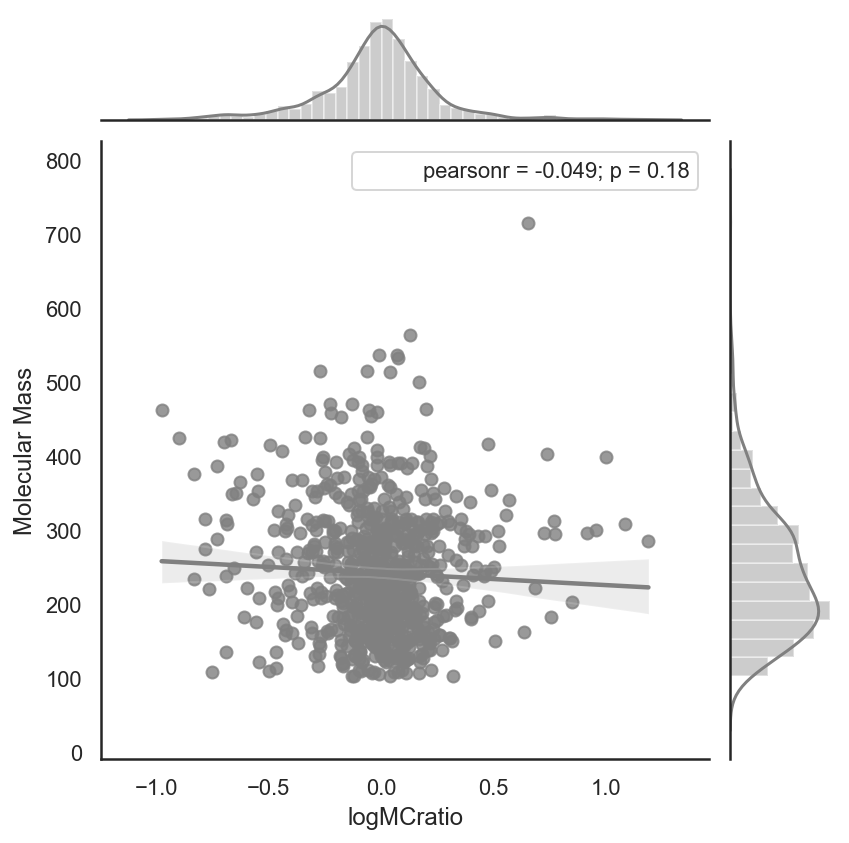

In [310]:
sns.set(font_scale=1)
sns.set_style('white')
fig = sns.jointplot('MCratio','Mass_Av', data=dfH, color='gray', kind='reg')
fig.annotate(stats.pearsonr)
plt.xlabel('logMCratio')
plt.ylabel('Molecular Mass')
#plt.errorbar(x, y, yerr=yerror, fmt=' ', barsabove=False, ecolor='darkcyan', elinewidth=0.3)
plt.show()
fig.savefig('logMCratio_mass.png', dpi=400)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


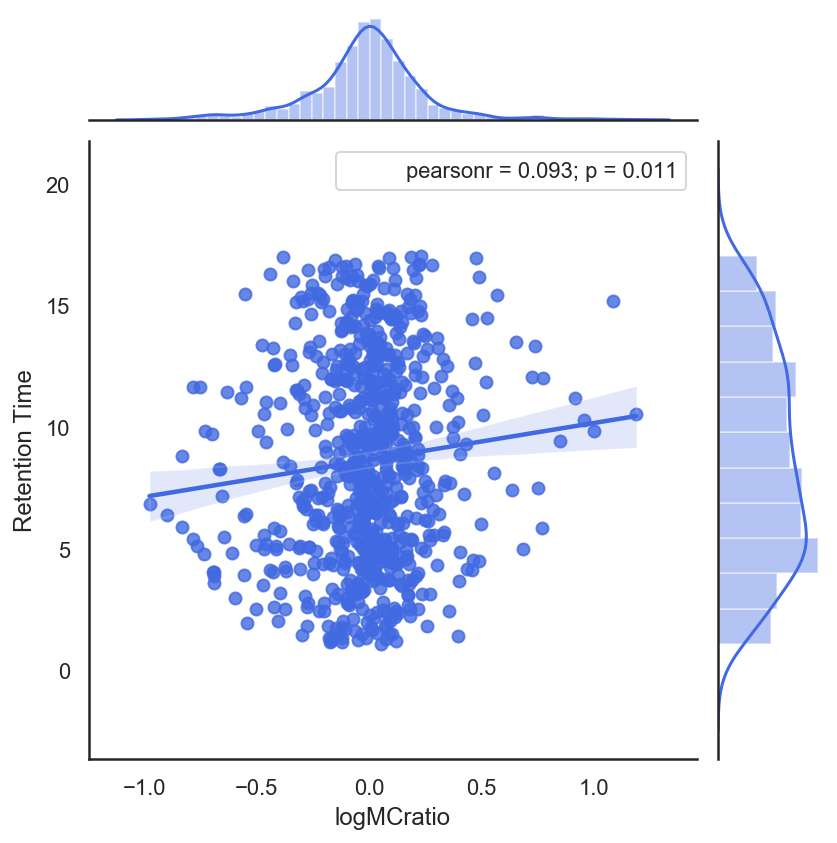

In [311]:
sns.set(font_scale=1)
sns.set_style('white')
fig = sns.jointplot('MCratio','Retention Time_av', data=dfH, color='royalblue', kind='reg')
fig.annotate(stats.pearsonr)
plt.xlabel('logMCratio')
plt.ylabel('Retention Time')
#plt.errorbar(x, y, yerr=yerror, fmt=' ', barsabove=False, ecolor='darkcyan', elinewidth=0.3)
plt.show()
fig.savefig('logMCratio_RT.png', dpi=400)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


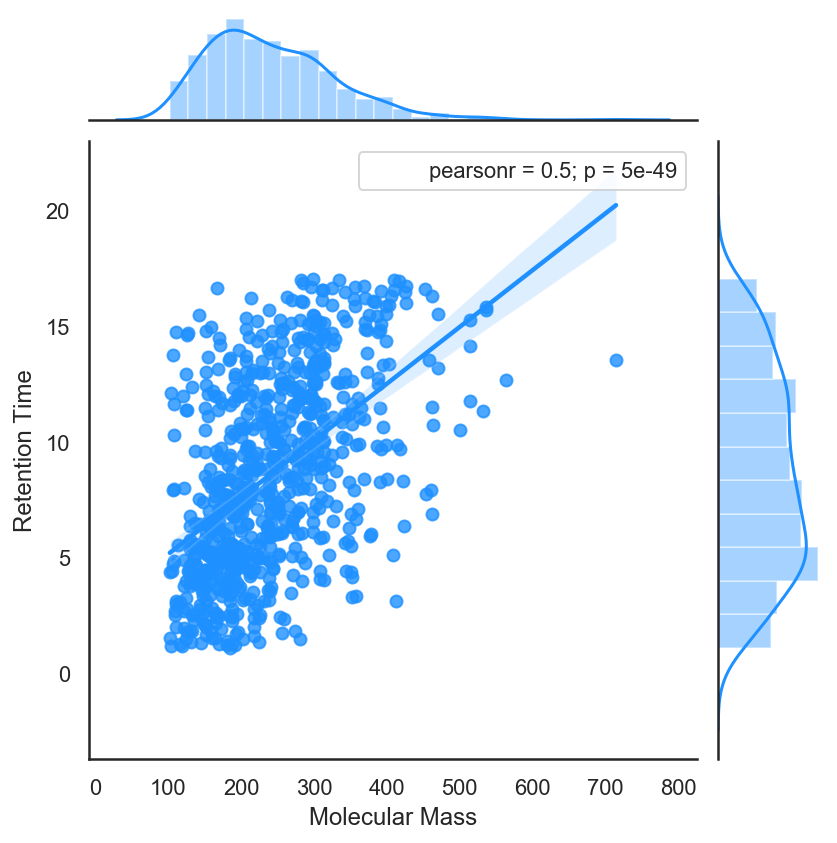

In [312]:
sns.set(font_scale=1)
sns.set_style('white')
fig = sns.jointplot('Mass_Av','Retention Time_av', data=dfH, color='dodgerblue', kind='reg')
fig.annotate(stats.pearsonr)
plt.xlabel('Molecular Mass')
plt.ylabel('Retention Time')
#plt.errorbar(x, y, yerr=yerror, fmt=' ', barsabove=False, ecolor='darkcyan', elinewidth=0.3)
plt.show()
fig.savefig('MassRT.png', dpi=400)